## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

### Reading in the image

In [2]:
if not os.path.exists("jet.bmp") :
    !wsl wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/jet.bmp --no-check-certificate

jet = cv2.imread('jet.bmp')

In [3]:
jet.shape

(512, 512, 3)

In [4]:
np.all(jet[:, :, 0] == jet[:, :, 1]) and np.all(jet[:, :, 1] == jet[:, :, 2])

True

In [5]:
jet = jet[:, :, 0]

In [6]:
jet_shape = jet.shape
jet.shape

(512, 512)

### Plotting the image and its histogram

In [7]:
def plot_img_hist(img):
    fig, axs = plt.subplots(1, 2)

    fig.set_size_inches(20, 10)

    axs[0].imshow(img, 'gray', vmin=0, vmax=256)
    axs[0].axis('off')

    H = cv2.calcHist([img], [0], None, [256], [0, 256])
    acc_H = np.cumsum(H)

    axs[1].plot(H / np.max(H), c='green')
    axs[1].plot(acc_H / np.max(acc_H), c='red')
    axs[1].grid()
    
    plt.show()

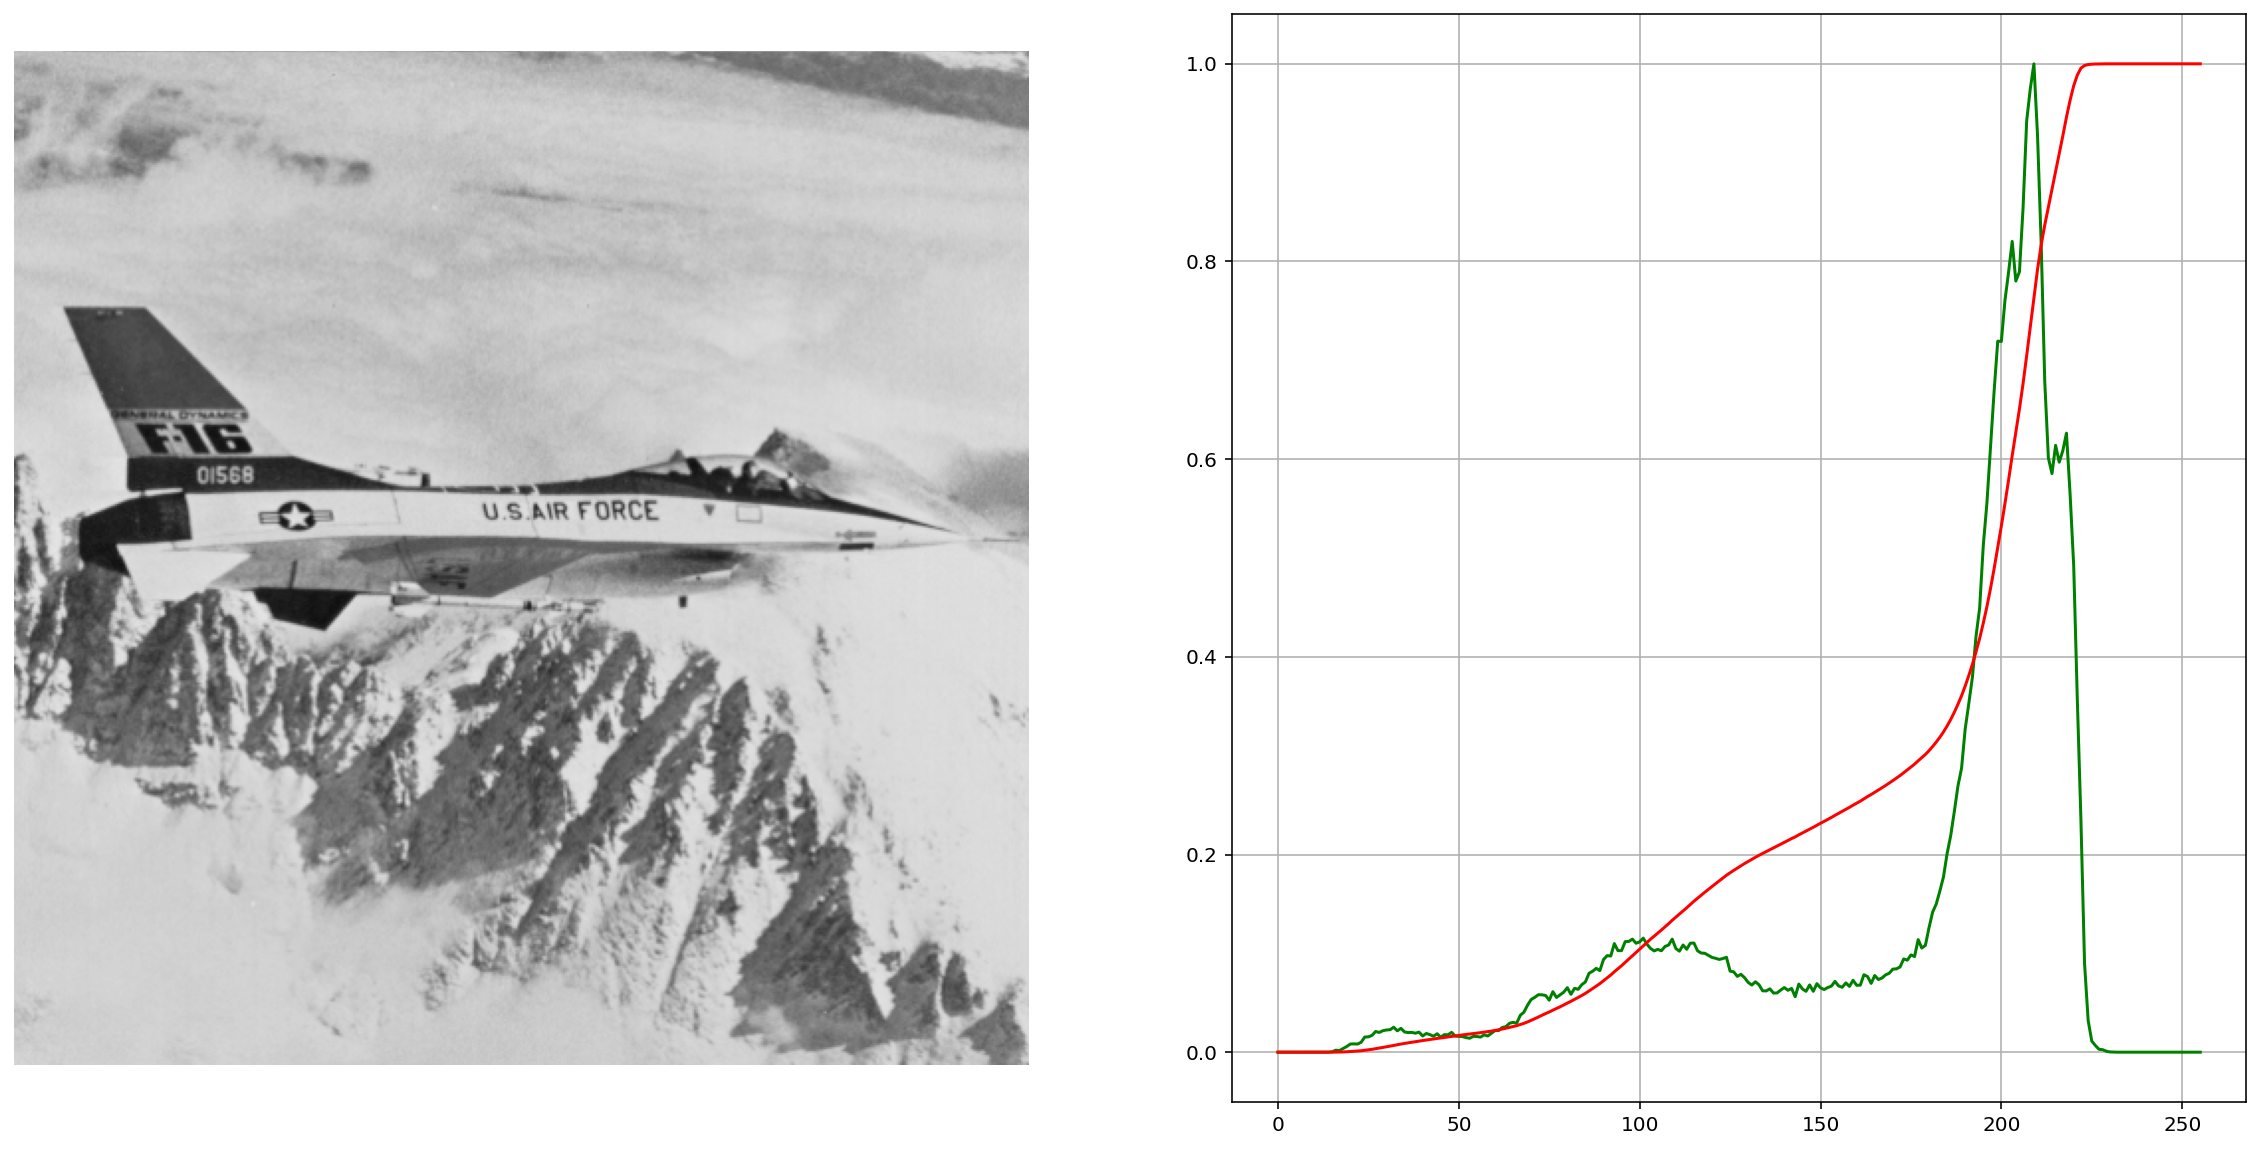

In [8]:
plot_img_hist(jet)

### Splitting pixels

In [9]:
def equalize_histogram(img):
    lm = int(np.median(img))
    
    H = cv2.calcHist([img], [0], None, [255], [0, 255])
    
    acc_lowerH = np.cumsum(H[:lm+1])
    acc_upperH = np.cumsum(H[lm+1:])
    
    acc_lowerH = acc_lowerH / np.max(acc_lowerH)
    acc_upperH = acc_upperH / np.max(acc_upperH)
    
    lower_lut = acc_lowerH * lm
    upper_lut = acc_upperH * (255 - lm - 1) + lm + 1
    
    lut = np.concatenate((lower_lut, upper_lut)).astype(np.uint8)
    
    return lut[img]

In [10]:
eq_jet = equalize_histogram(jet)

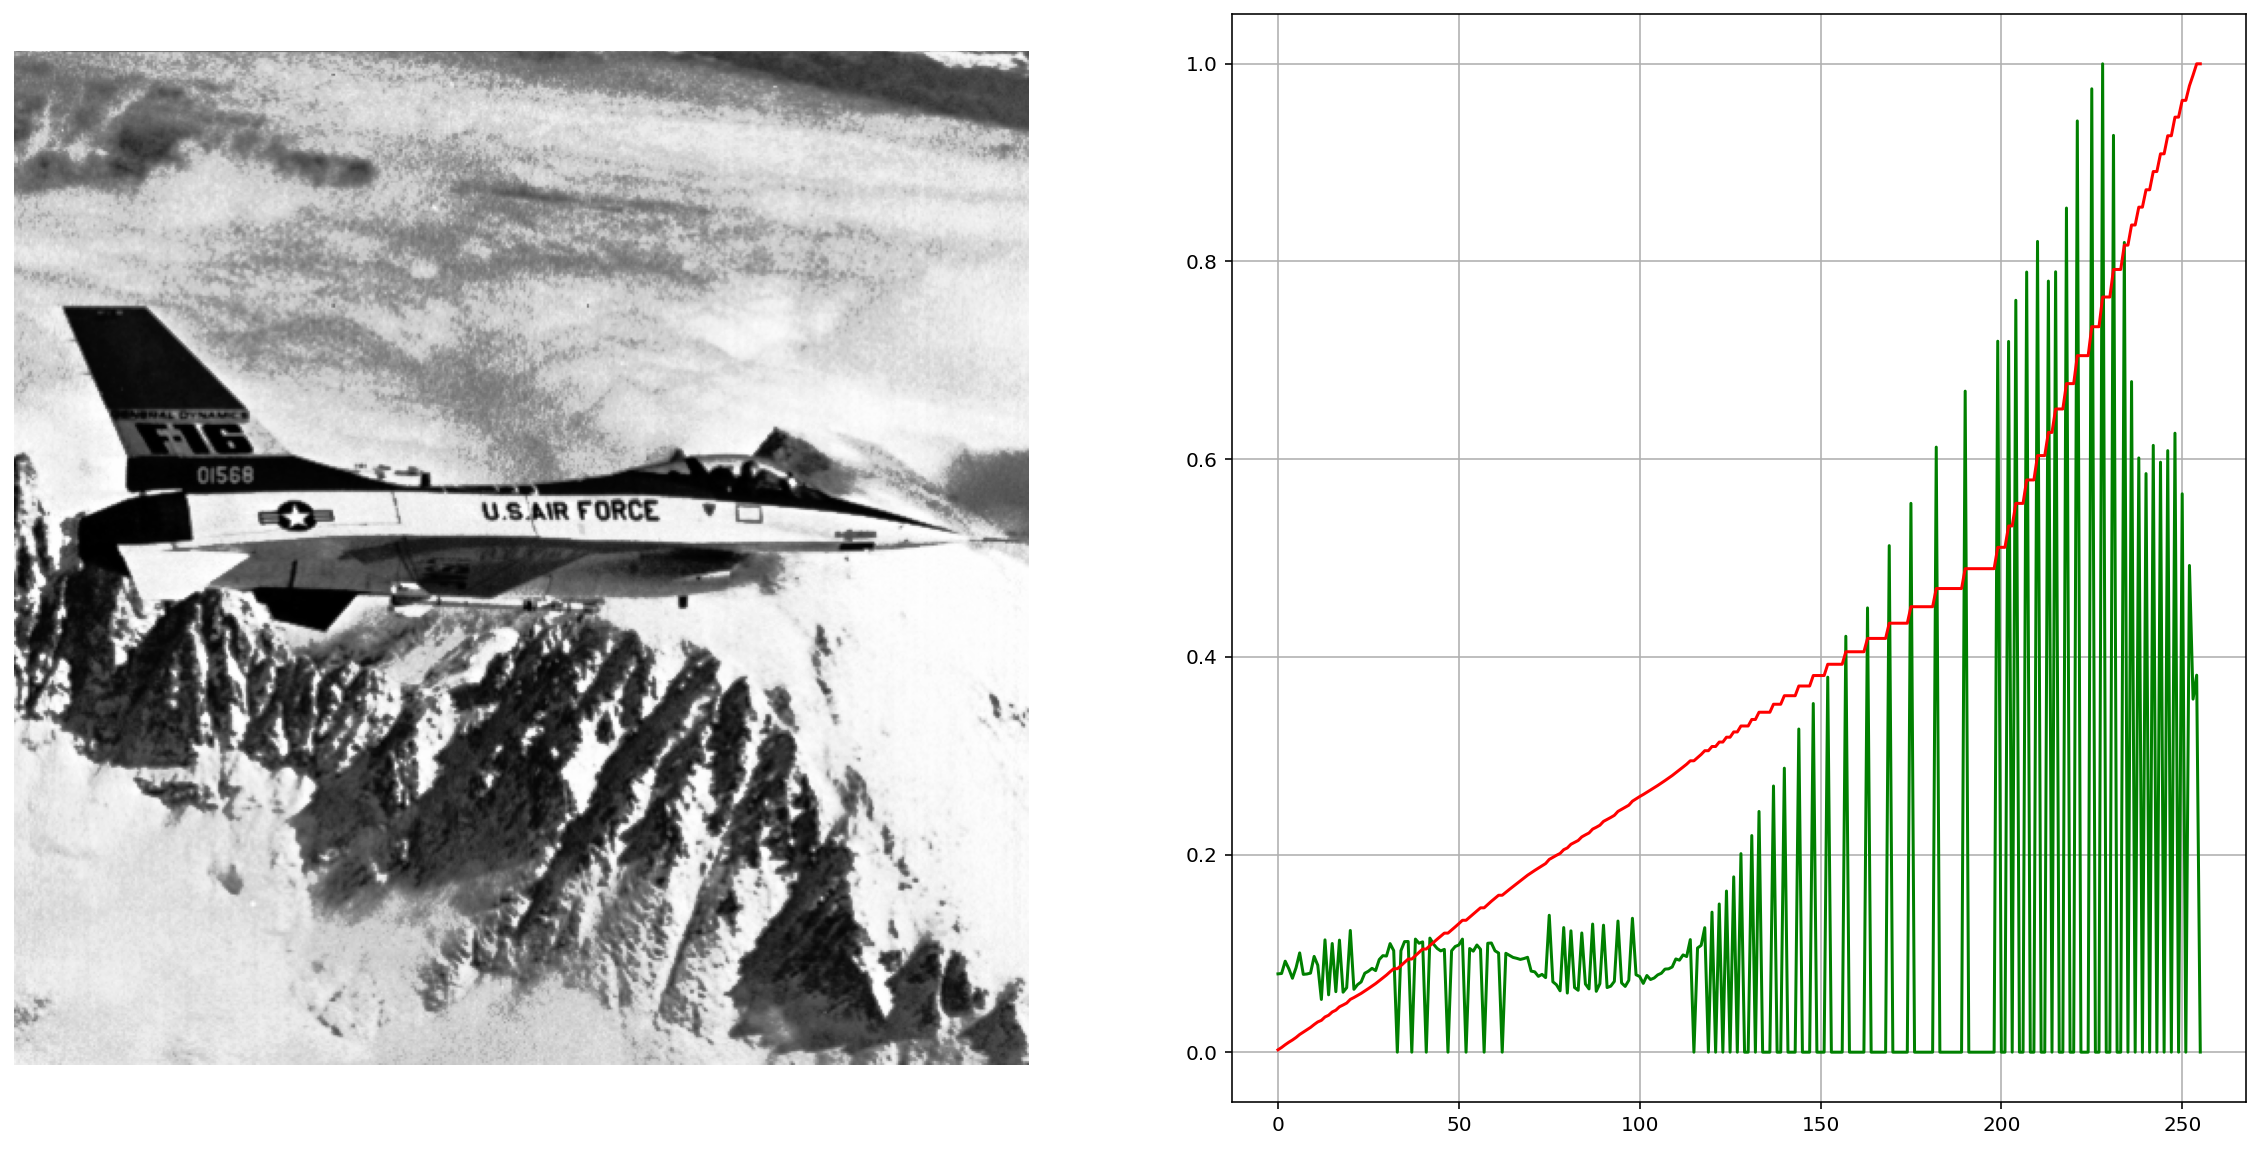

In [11]:
plot_img_hist(eq_jet)